# Honey Production

We intend to create a linear regression with real-world data regarding the decline of the honeybee population and any possible trends.

## We use a Kaggle dataset - Honey Production

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Let's read the dataset and view the first values.

In [6]:
df = pd.read_csv("C:/Users/david/OneDrive/Documents/Proyectos Data Science/honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### Values of the table.
We notice that the column names are: 
1. 'state'
3. numcol
4. yieldpercol
5. totalprod
6. stocks
7. priceperlb
8. prodvalue
9. year

We want to analyze the total production of honey per year, so we group the honey.

In [8]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [12]:
X = prod_per_year['year']
X.head()

0    1998
1    1999
2    2000
3    2001
4    2002
Name: year, dtype: int64

For knowing the dimensions of X

In [15]:
print(np.shape(X))

(15,)


We need to reshape to a two dimensional matrix.

In [18]:
X = X.values.reshape(-1, 1)
print(np.shape(X))

(15, 1)


Let's define our variable $Y$ which is the production per year.

In [25]:
# Objective variable is the production per year
y = prod_per_year['totalprod']
print(y)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


Let's create a scatterplot comparing our variables $X$ and $Y$.

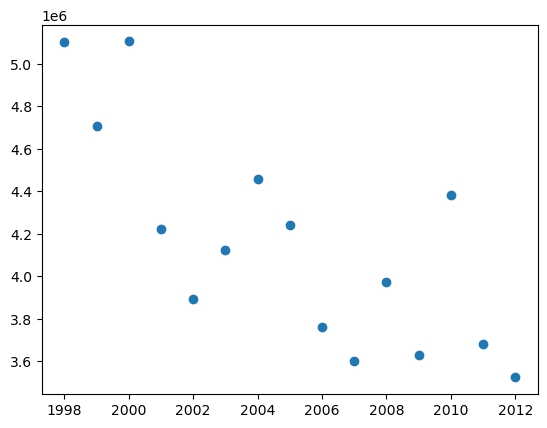

In [32]:
# For a scatterplot
plt.scatter(X,y)
plt.show()

There is a possible linear regression

In [35]:
# There is a possible linear regression
regr = linear_model.LinearRegression()
regr.fit(X,y)


LinearRegression()

List the two coefficients for a simple linear regression.

In [38]:
# List as it can work with multiple data in this case. We use [0] for having the one that we want.
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238194
181208083.1073298


The predictions based on this model are the following.

In [43]:
# Predictions
y_predict = regr.predict(X)
print(y_predict)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


Plotting the regression

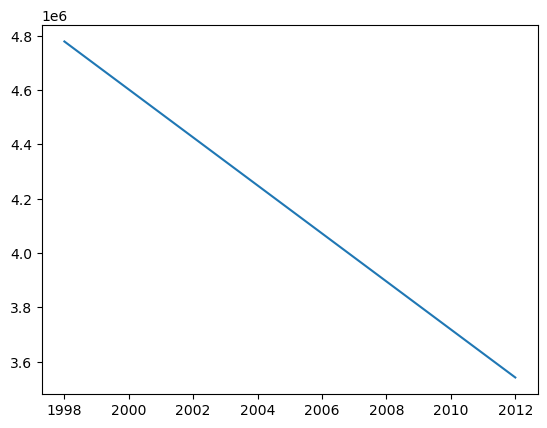

In [46]:
# Plotting the regression
plt.plot(X, y_predict)
plt.show()


Let's see for a 2050 prediction

In [49]:
# Prediction for 2050
# List of numbers from 2013 to 2050
X_future = np.array(range(2013, 2051))
print(np.shape(X_future ))

(38,)


Reshaping again, as the first time with the oriignal $X$.

In [53]:
# Reshape X_future to a 2D array for prediction
X_future = X_future.reshape(-1, 1)
print(np.shape(X_future ))

(38, 1)


The prediction results are as the following.

In [58]:
future_predict = regr.predict(X_future)
print(future_predict)

[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829
 2747337.8303659  2659034.64121351 2570731.45206112 2482428.26290876
 2394125.07375637 2305821.88460398 2217518.69545159 2129215.50629923
 2040912.31714684 1952609.12799445 1864305.93884209 1776002.7496897
 1687699.56053731 1599396.37138492 1511093.18223256 1422789.99308017
 1334486.80392778 1246183.61477539 1157880.42562303 1069577.23647064
  981274.04731825  892970.85816586  804667.6690135   716364.47986111
  628061.29070872  539758.10155633  451454.91240397  363151.72325158
  274848.53409919  186545.34494683]


Plotting the scatterplot, with the original data and the Future prediction.

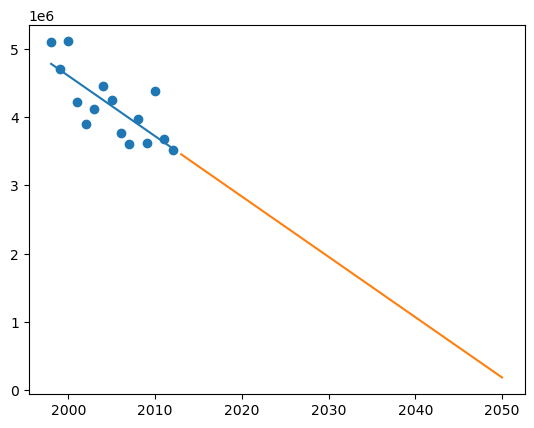

In [80]:
# For a scatterplot
plt.scatter(X,y)
# plt.show()
future_predict = regr.predict(X_future)

# Plotting the regression
plt.plot(X, y_predict)
# plt.show()

# Plotting the prediction
plt.plot(X_future, future_predict, label='Future Prediction')
plt.show()

